# CSE 252B: Computer Vision II, Winter 2022 – Assignment 5
### Instructor: Ben Ochoa
### Due: Wednesday, March 16, 2022, 11:59 PM

## Instructions
* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* This assignment contains both math and programming problems.
* All solutions must be written in this notebook
* Math problems must be done in Markdown/LATEX.
* You must show your work and describe your solution.
* Programming aspects of this assignment must be completed using Python in this notebook.
* Your code should be well written with sufficient comments to understand, but there is no need to write extra markdown to describe your solution if it is not explictly asked for.
* This notebook contains skeleton code, which should not be modified (This is important for standardization to facilate effecient grading).
* You may use python packages for basic linear algebra, but you may not use packages that directly solve the problem. If you are uncertain about using a specific package, then please ask the instructional staff whether or not it is allowable.
* You must submit this notebook exported as a pdf. You must also submit this notebook as an .ipynb file.
* Your code and results should remain inline in the pdf (Do not move your code to an appendix).
* You must submit both files (.pdf and .ipynb) on Gradescope. You must mark each problem on Gradescope in the pdf.
* It is highly recommended that you begin working on this assignment early.

## Problem 1 (Math): Point on Line Closest to the Origin (5 points)
  Given a line $\boldsymbol{l} = (a, b, c)^\top$, show that the point on
  $\boldsymbol{l}$ that is closest to the origin is the point $\boldsymbol{x} =
  (-ac, -bc, a^2+b^2)^\top$ (Hint: this calculation is needed in the
  two-view optimal triangulation method used below).

"""Write your solution here.""" <br>

We are given a line $\boldsymbol{l} = (a, b, c)^\top$, the normal vector for which is $\boldsymbol{n^\top} = (a, b)$, which can be Homogenized as $\boldsymbol{n^\top} = (a, b, 1)$. <br>

We know that the point on $\boldsymbol{l}$ that is closest to the origin, lies on the normal vector $\boldsymbol{n}$. We will form a line with two points on $\boldsymbol{n}$ and find the point of intersection. 

Let $\boldsymbol{x} = (x, y, 1)^\top$ be a point on the normal vector $\boldsymbol{n}$. Any other point on the vector can be expressed as a translation of $\boldsymbol{x}$ by $\boldsymbol{n}$, i.e. $\boldsymbol{x^{'}} = (x+a, y+b, 2)^\top$ <br>

Using pencil of points representation, we can get the line formed by $\boldsymbol{x}$ and $\boldsymbol{x^{'}}$ as follows: <br>

$X(\lambda) = \lambda \boldsymbol{x} + (1 - \lambda)\boldsymbol{x^{'}}$

For the given line $\boldsymbol{l}$, it is known that $X(\lambda)$ intersects it at a point $X_l$ or $X(\lambda_l)$ such that $\boldsymbol{l}^\top X(\lambda_l) = 0$. Using the latter equation to solve for $\lambda_l$ <br>

$\boldsymbol{l}^\top(\lambda \boldsymbol{x} + (1 - \lambda)\boldsymbol{x^{'}})$ = 0 <br>

$\boldsymbol{l}^\top \lambda \boldsymbol{x} + \boldsymbol{l}^\top \boldsymbol{x^{'}} - \boldsymbol{l}^\top \lambda \boldsymbol{x^{'}}$ = 0 <br>

$\lambda_l = \frac{- \boldsymbol{l}^\top \boldsymbol{x^{'}}}{\boldsymbol{l}^\top \boldsymbol{x} - \boldsymbol{l}^\top \boldsymbol{x^{'}}}$ <br>

Substituting the values of $\boldsymbol{l}$, $\boldsymbol{x^{'}}$ and $\boldsymbol{x}$ <br>

$\lambda_l = \frac{- (a,b,c)^\top (x+a, y+b, 2)}{(a,b,c)^\top (x, y, 2) - (a,b,c)^\top (x+a, y+b, 2)}$ <br>

$\lambda_l = \frac{a(x + a) + b(y + b) + 2c}{a^2 + b^2 + c}$ <br>

Substituting the value of $\lambda_l$ in $X(\lambda_l)$ <br>

$X(\lambda_l) = \frac{a(x + a) + b(y + b) + 2c}{a^2 + b^2 + c} (x, y, 1) + (\frac{-ax - by - c}{a^2 + b^2 + c}) (x+a, y+b, 2)$ <br>

For the problem at hand, we wish to find the point on $\boldsymbol{l}$ closest to the origin, therefore substituting $\boldsymbol{x} = (x, y, 1)^\top$ with $\boldsymbol{x} = (0, 0, 1)^\top$, we get <br>

$X(\lambda_l) = \frac{a^2 + b^2 + 2c}{a^2 + b^2 + c} (0, 0, 1)^\top + (\frac{-c}{a^2 + b^2 + c}) (a, b, 2)^\top$ <br>

$X(\lambda_l) = (\frac{-ac}{a^2 + b^2 + c}, \frac{-bc}{a^2 + b^2 + c}, \frac{a^2 + b^2}{a^2 + b^2 + c})^\top$ <br>

Since $X(\lambda_l)$ is defined upto scale, we can multiply it by $a^2 + b^2 + c$ to obtain the point on $\boldsymbol{l}$ closest to the origin

$X(\lambda_l) = (-ac, -bc, a^2 + b^2)^\top$ <br>

Hence proved.

## Problem 2 (Programming): Feature Detection (20 points)
Download input data from the course website. The file IMG_5030.jpeg
contains image 1 and the file IMG_5031.jpeg contains image 2. 

For each input image, calculate an image where each pixel value is the minor
eigenvalue of the gradient matrix

$N=\left[ \begin{array}{cc}
\sum\limits_w I_x^2 & \sum\limits_w I_x I_y\\
\sum\limits_w I_x I_y & \sum\limits_w I_y^2
\end{array} \right]$

where w is the window about the pixel, and $I_x$ and $I_y$ are the gradient images in
the x and y direction, respectively. Calculate the gradient images using the fivepoint
central difference operator. Set resulting values that are below a specified
threshold value to zero (hint: calculating the mean instead of the sum in N allows
for adjusting the size of the window without changing the threshold value). Apply
an operation that suppresses (sets to 0) local (i.e., about a window) nonmaximum
pixel values in the minor eigenvalue image. Vary these parameters such that
1350–1400 features are detected in each image. For resulting nonzero pixel
values, determine the subpixel feature coordinate using the Forstner corner point
operator.

#### Report your final values for:
 * the size of the feature detection window (i.e. the size of the window used to calculate the elements in the gradient matrix N)
 * the minor eigenvalue threshold value 
 * the size of the local nonmaximum suppression window 
 * the resulting number of features detected (i.e. corners) in each image.

#### Display figures for:
 * original images with detected features, where the detected features are indicated by a square window (the size of the detection window) about the features
 
A typical implementation takes around <strong>30</strong> seconds. If yours takes more than <strong>60</strong>, you may lose points.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.signal import convolve2d as conv2d
import scipy.ndimage

def ImageGradient(I):
    # inputs: 
    # I is the input image (may be mxn for Grayscale or mxnx3 for RGB)
    #
    # outputs:
    # Ix is the derivative of the magnitude of the image w.r.t. x
    # Iy is the derivative of the magnitude of the image w.r.t. y
    
    m, n = I.shape[:2]
    
    """your code here"""
    k = 1/12 * np.array([-1, 8, 0, -8, 1]) # Convolution kernel
    Ix = np.zeros((m,n,3))
    Iy = np.zeros((m,n,3))
    for channel in range(I.shape[2]):
        for row in range(m):
            convolve_output = np.convolve(I[row, :, channel], k.T, 'valid')
            convolve_output_padded = np.pad(convolve_output, (2,2), 'constant')
            Ix[row, :, channel] = convolve_output_padded
        for col in range(n):
            convolve_output = np.convolve(I[:, col, channel], k, 'valid')
            convolve_output_padded = np.pad(convolve_output, (2,2), 'constant')
            Iy[:,col, channel] = convolve_output_padded
    return Ix, Iy
  

def MinorEigenvalueImage(Ix, Iy, w):
    # Calculate the minor eigenvalue image J
    #
    # inputs:
    # Ix is the derivative of the magnitude of the image w.r.t. x
    # Iy is the derivative of the magnitude of the image w.r.t. y
    # w is the size of the window used to compute the gradient matrix N
    #
    # outputs:
    # J0 is the mxn minor eigenvalue image of N before thresholding

    m, n = Ix.shape[:2]
    J0 = np.zeros((m,n))

    #Calculate your minor eigenvalue image J0.
    """your code here"""
    Ixx1 = np.multiply(Ix[:,:,0], Ix[:,:,0])
    Ixx2 = np.multiply(Ix[:,:,1], Ix[:,:,1])
    Ixx3 = np.multiply(Ix[:,:,2], Ix[:,:,2])
    Ixx  = Ixx1 + Ixx2 + Ixx3
    
    Iyy1 = np.multiply(Iy[:,:,0], Iy[:,:,0])
    Iyy2 = np.multiply(Iy[:,:,1], Iy[:,:,1])
    Iyy3 = np.multiply(Iy[:,:,2], Iy[:,:,2])
    Iyy  = Iyy1 + Iyy2 + Iyy3
    
    Ixy1 = np.multiply(Ix[:,:,0], Iy[:,:,0])
    Ixy2 = np.multiply(Ix[:,:,1], Iy[:,:,1])
    Ixy3 = np.multiply(Ix[:,:,2], Iy[:,:,2])
    Ixy  = Ixy1 + Ixy2 + Ixy3
    
    half = int(np.floor(w/2))
    for i in range(half, m-half):
        for j in range(half, n-half):
            Ixx_sum = np.sum(Ixx[i-half:i+half+1, j-half:j+half+1])
            Iyy_sum = np.sum(Iyy[i-half:i+half+1, j-half:j+half+1])
            Ixy_sum = np.sum(Ixy[i-half:i+half+1, j-half:j+half+1])
            trace = Ixx_sum + Iyy_sum
            determinant = (Ixx_sum * Iyy_sum) - (Ixy_sum*Ixy_sum)
            rootTerm = max(0, trace*trace - 4*determinant)
            J0[i,j] = (0.5) * (trace - np.sqrt(rootTerm))
    return J0
  
def NMS(J, w_nms):
    # Apply nonmaximum supression to J using window w_nms
    #
    # inputs: 
    # J is the minor eigenvalue image input image after thresholding
    # w_nms is the size of the local nonmaximum suppression window
    # 
    # outputs:
    # J2 is the mxn resulting image after applying nonmaximum suppression
    # 
    import scipy.ndimage as ndi
    J2 = J.copy()
    """your code here"""
    w = ndi.maximum_filter(J2, size=w_nms, mode='constant', cval=0.0)
    J2[ J2 != w] = 0
    return J2
  
def ForstnerCornerDetector(Ix, Iy, w, t, w_nms):
    # Calculate the minor eigenvalue image J
    # Threshold J
    # Run non-maxima suppression on the thresholded J
    # Gather the coordinates of the nonzero pixels in J 
    # Then compute the sub pixel location of each point using the Forstner operator
    #
    # inputs:
    # Ix is the derivative of the magnitude of the image w.r.t. x
    # Iy is the derivative of the magnitude of the image w.r.t. y
    # w is the size of the window used to compute the gradient matrix N
    # t is the minor eigenvalue threshold
    # w_nms is the size of the local nonmaximum suppression window
    #
    # outputs:
    # C is the number of corners detected in each image
    # pts is the 2xC array of coordinates of subpixel accurate corners
    #     found using the Forstner corner detector
    # J0 is the mxn minor eigenvalue image of N before thresholding
    # J1 is the mxn minor eigenvalue image of N after thresholding
    # J2 is the mxn minor eigenvalue image of N after thresholding and NMS

    m, n = Ix.shape[:2]
    J0 = np.zeros((m,n))
    J1 = np.zeros((m,n))

    #Calculate your minor eigenvalue image J0 and its thresholded version J1.
    """your code here"""
    J0 = MinorEigenvalueImage(Ix, Iy, w)
    J1 = np.copy(J0)
    J1[J1 < t] = 0
                
    #Run non-maxima suppression on your thresholded minor eigenvalue image.
    J2 = NMS(J1, w_nms)
    
    #Detect corners.
    """your code here"""
    half = int(np.floor(w/2))
    mask = J2!=0
    C = np.sum(mask)
    pts = np.array((2, C))
    
    Ixx1 = np.multiply(Ix[:,:,0], Ix[:,:,0])
    Ixx2 = np.multiply(Ix[:,:,1], Ix[:,:,1])
    Ixx3 = np.multiply(Ix[:,:,2], Ix[:,:,2])
    Ixx  = Ixx1 + Ixx2 + Ixx3
    
    Iyy1 = np.multiply(Iy[:,:,0], Iy[:,:,0])
    Iyy2 = np.multiply(Iy[:,:,1], Iy[:,:,1])
    Iyy3 = np.multiply(Iy[:,:,2], Iy[:,:,2])
    Iyy  = Iyy1 + Iyy2 + Iyy3
    
    Ixy1 = np.multiply(Ix[:,:,0], Iy[:,:,0])
    Ixy2 = np.multiply(Ix[:,:,1], Iy[:,:,1])
    Ixy3 = np.multiply(Ix[:,:,2], Iy[:,:,2])
    Ixy  = Ixy1 + Ixy2 + Ixy3
    
    xIxx = np.zeros((m,n))
    xIxy = np.zeros((m,n))
    yIyy = np.zeros((m,n))
    yIxy = np.zeros((m,n))
    for i in range(m):
        xIxx[i, :] = i * Ixx[i, :]
        xIxy[i, :] = i * Ixy[i, :]
    for j in range(n):
        yIyy[:, j] = j * Iyy[:, j]
        yIxy[:, j] = j * Ixy[:, j]
    
    pts_x = []
    pts_y = []
    half = int(np.floor(w/2))
    for i in range(half, m-half):
        for j in range(half, n-half):
            if(J2[i,j] != 0):
                A = np.array([[np.sum(Ixx[i-half:i+half+1, j-half:j+half+1]),
                               np.sum(Ixy[i-half:i+half+1, j-half:j+half+1])],
                              [np.sum(Ixy[i-half:i+half+1, j-half:j+half+1]),
                               np.sum(Iyy[i-half:i+half+1, j-half:j+half+1])]])
                b = np.array([[np.sum(np.add(xIxx[i-half:i+half+1, j-half:j+half+1], yIxy[i-half:i+half+1, j-half:j+half+1]))],
                              [np.sum(np.add(xIxy[i-half:i+half+1, j-half:j+half+1], yIyy[i-half:i+half+1, j-half:j+half+1]))]])
                x = np.dot(np.linalg.inv(A),b)
                pts_x.append(x[1])
                pts_y.append(x[0])

    pts = np.array([pts_x, pts_y]).reshape((2, C))
    return C, pts, J0, J1, J2


# feature detection
def RunFeatureDetection(I, w, t, w_nms):
    Ix, Iy = ImageGradient(I)
    C, pts, J0, J1, J2 = ForstnerCornerDetector(Ix, Iy, w, t, w_nms)
    return C, pts, J0, J1, J2

took 29.397588 secs


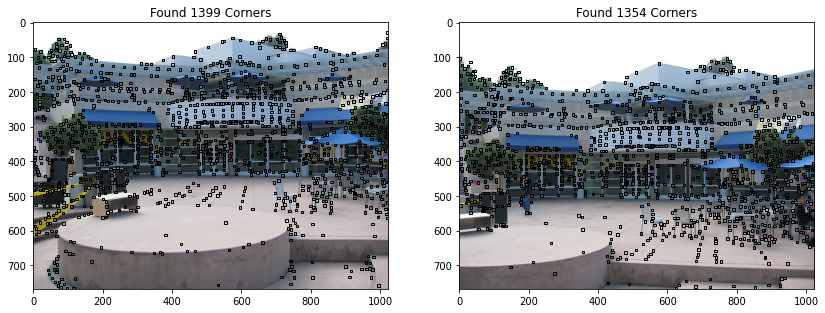

In [2]:
from PIL import Image
import time

# input images
I1 = np.array(Image.open('IMG_5030.jpg'), dtype='float')/255.
I2 = np.array(Image.open('IMG_5031.jpg'), dtype='float')/255.

# parameters to tune
w = 7
t = 0.055
w_nms = 9

tic = time.time()

# run feature detection algorithm on input images
C1, pts1, J1_0, J1_1, J1_2 = RunFeatureDetection(I1, w, t, w_nms)
C2, pts2, J2_0, J2_1, J2_2 = RunFeatureDetection(I2, w, t, w_nms)
toc = time.time() - tic

print('took %f secs'%toc)

# display results
plt.figure(figsize=(14,24))

# show corners on original images
ax = plt.subplot(1,2,1)
plt.imshow(I1)
for i in range(C1): # draw rectangles of size w around corners
    x,y = pts1[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
# plt.plot(pts1[0,:], pts1[1,:], '.b') # display subpixel corners
plt.title('Found %d Corners'%C1)

ax = plt.subplot(1,2,2)
plt.imshow(I2)
for i in range(C2):
    x,y = pts2[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
# plt.plot(pts2[0,:], pts2[1,:], '.b')
plt.title('Found %d Corners'%C2)

plt.show()

#### Final values for parameters
* w = 7
* t = 0.055
* w_nms = 9
* C1 = 1399
* C2 = 1354

## Problem 3 (Programming): Feature matching (15 points)
Determine the set of one-to-one putative feature correspondences by performing
a brute-force search for the greatest correlation coefficient value (in the range
[-1, 1]) between the detected features in image 1 and the detected features in
image 2. Only allow matches that are above a specified correlation coefficient
threshold value (note that calculating the correlation coefficient allows for adjusting
the size of the matching window without changing the threshold value).
Further, only allow matches that are above a specified distance ratio threshold
value, where distance is measured to the next best match for a given feature.
Vary these parameters such that <strong>225-275</strong> putative feature correspondences are
established. Optional: constrain the search to coordinates in image 2 that are
within a proximity of the detected feature coordinates in image 1.

**Note: You must center each window at the sub-pixel corner
coordinates while computing normalized cross correlation; otherwise, you
will lose points.**

#### Report your final values for:
* the size of the matching window
* the correlation coefficient threshold
* the distance ratio threshold 
* the size of the proximity window (if used)
* the resulting number of putative feature correspondences (i.e. matched features)

#### Display figures for:
* pair of images, where the matched features are indicated by a square window (the size of the matching window) about the feature and a line segment is drawn from the feature to the coordinates of the corresponding feature in the other image

A typical implementation takes around <strong>40</strong> seconds. If yours takes more than <strong>80</strong> seconds, you may lose points.

In [3]:
def NCC(I1, I2, pts1, pts2, w, p):
    # compute the normalized cross correlation between image patches I1, I2
    # result should be in the range [-1,1]
    #    
    # Do ensure that windows are centered at the sub-pixel co-ordinates 
    #      while computing normalized cross correlation.
    #
    # inputs:
    # I1, I2 are the input images
    # pts1, pts2 are the point to be matched
    # w is the size of the matching window to compute correlation coefficients
    # p is the size of the proximity window
    #
    # output:
    # normalized cross correlation matrix of scores between all windows in 
    #    image 1 and all windows in image 2
    
    """your code here"""
    def bilinear_interpolation(I, x, y, half):
        x_s0 = int(x)
        x_s1 = x_s0 + 1
        y_s0 = int(y)
        y_s1 = y_s0 + 1
        I0 = I[x_s0 - half: x_s0 + half + 1, y_s0 - half: y_s0 + half + 1] * (x_s1 - x) + \
             I[x_s1 - half: x_s1 + half + 1, y_s0 - half: y_s0 + half + 1] * (x - x_s0)
        I1 = I[x_s0 - half: x_s0 + half + 1, y_s1 - half: y_s1 + half + 1] * (x_s1 - x) + \
             I[x_s1 - half: x_s1 + half + 1, y_s1 - half: y_s1 + half + 1] * (x - x_s0)
        return I0 * (y_s1 - y) + I1 * (y - y_s0)
        
    def correlation(window1, window2):
        window1_std = window1 - np.mean(window1)
        window2_std = window2 - np.mean(window2)
        window1_prod = window1_std * window1_std
        window2_prod = window2_std * window2_std
        corrVal = np.sum(window1_std * window2_std) / np.sqrt(np.sum(window1_prod) * np.sum(window2_prod))
        assert(-1.0 <= corrVal <= 1.0)
        return corrVal
    
    m, n = I1.shape[:2]
    half = int(np.floor(w/2))
    I1c = np.zeros((m+half+half, n+half+half, 3))
    I2c = np.zeros((m+half+half, n+half+half, 3))
    I1c[:,:,0] = np.pad(I1[:,:,0], [(half, half), (half, half)], 'constant')
    I1c[:,:,1] = np.pad(I1[:,:,1], [(half, half), (half, half)], 'constant')
    I1c[:,:,2] = np.pad(I1[:,:,2], [(half, half), (half, half)], 'constant')
    
    I2c[:,:,0] = np.pad(I2[:,:,0], [(half, half), (half, half)], 'constant')
    I2c[:,:,1] = np.pad(I2[:,:,1], [(half, half), (half, half)], 'constant')
    I2c[:,:,2] = np.pad(I2[:,:,2], [(half, half), (half, half)], 'constant')
    
    windowI1R = np.zeros((w,w,pts1.shape[1]))
    windowI1G = np.zeros((w,w,pts1.shape[1]))
    windowI1B = np.zeros((w,w,pts1.shape[1]))
    windowI2R = np.zeros((w,w,pts2.shape[1]))
    windowI2G = np.zeros((w,w,pts2.shape[1]))
    windowI2B = np.zeros((w,w,pts2.shape[1]))
    
    for i in range(pts1.shape[1]):
        x, y = pts1[0][i] + half, pts1[1][i] + half
        windowR = bilinear_interpolation(I1c[:,:,0], y, x, half)
        windowG = bilinear_interpolation(I1c[:,:,1], y, x, half)
        windowB = bilinear_interpolation(I1c[:,:,2], y, x, half)
        windowI1R[:,:,i] = windowR
        windowI1G[:,:,i] = windowG
        windowI1B[:,:,i] = windowB
        
    for i in range(pts2.shape[1]):
        x, y = pts2[0][i] + half, pts2[1][i] + half
        windowR = bilinear_interpolation(I2c[:,:,0], y, x, half)
        windowG = bilinear_interpolation(I2c[:,:,1], y, x, half)
        windowB = bilinear_interpolation(I2c[:,:,2], y, x, half)
        windowI2R[:,:,i] = windowR
        windowI2G[:,:,i] = windowG
        windowI2B[:,:,i] = windowB
        
    scores = np.zeros((pts1.shape[1], pts2.shape[1]))
    for i in range(windowI1R.shape[-1]):
        for j in range(windowI2R.shape[-1]):
            if(np.linalg.norm(pts1[:, i] - pts2[:, j]) < p):
                scores[i, j] = min(correlation(windowI1R[:, :, i], windowI2R[:, :, j]),
                                   min(correlation(windowI1G[:, :, i], windowI2G[:, :, j]),
                                       correlation(windowI1B[:, :, i], windowI2B[:, :, j])))
            else:
                scores[i, j] = -1.0
    return scores


def Match(scores, t, d):
    # perform the one-to-one correspondence matching on the correlation coefficient matrix
    # 
    # inputs:
    # scores is the NCC matrix
    # t is the correlation coefficient threshold
    # d distance ration threshold
    #
    # output:
    # 2xM array of the feature coordinates in image 1 and image 2,
    # where M is the number of matches.
    
    """your code here"""
    inds = []
    pts_x = []
    pts_y = []
    mask = np.ones(scores.shape)
    masked_corr = np.multiply(scores, mask)
    while np.max(masked_corr) > t:
        index = np.unravel_index(np.argmax(masked_corr, axis=None), masked_corr.shape)
        best_val = np.amax(scores)
        scores[index[0], index[1]] = -1
        next_best = max(np.amax(scores[index[0], :]), np.amax(scores[:, index[1]]))
        scores[index[0], index[1]] = best_val
        if((1 - scores[index[0], index[1]]) < ((1 - next_best) * d)):
            pts_x.append(index[0])
            pts_y.append(index[1])
        mask[index[0], :] = 0
        mask[:, index[1]] = 0
        masked_corr = np.multiply(scores, mask)
    inds = np.array([pts_x, pts_y])
    return inds



def RunFeatureMatching(I1, I2, pts1, pts2, w, t, d, p):
    # inputs:
    # I1, I2 are the input images
    # pts1, pts2 are the point to be matched
    # w is the size of the matching window to compute correlation coefficients
    # t is the correlation coefficient threshold
    # d distance ration threshold
    # p is the size of the proximity window
    #
    # outputs:
    # inds is a 2xk matrix of matches where inds[0,i] indexs a point pts1 
    #     and inds[1,i] indexs a point in pts2, where k is the number of matches
    
    scores = NCC(I1, I2, pts1, pts2, w, p)
    inds = Match(scores, t, d)
    return inds

took 27.579075 secs


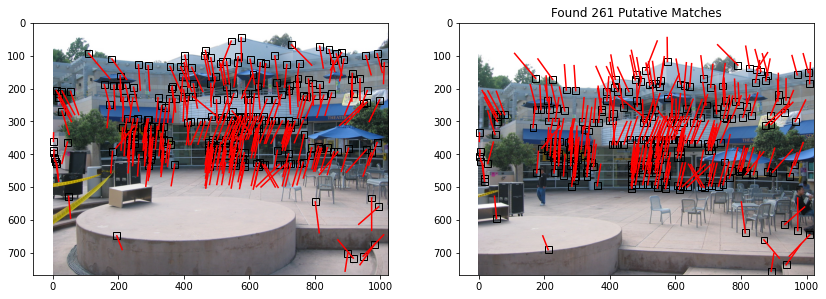

unique points in image 1: 261
unique points in image 2: 261


In [4]:
# parameters to tune
w = 21
t = 0.85
d = 0.95
p = 100

tic = time.time()
# run the feature matching algorithm on the input images and detected features
inds = RunFeatureMatching(I1, I2, pts1, pts2, w, t, d, p)
toc = time.time() - tic

print('took %f secs'%toc)

# create new matrices of points which contain only the matched features 
match1 = pts1[:,inds[0,:]]
match2 = pts2[:,inds[1,:]]

# # display the results
plt.figure(figsize=(14,24))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)
plt.title('Found %d Putative Matches'%match1.shape[1])
for i in range(match1.shape[1]):
    x1,y1 = match1[:,i]
    x2,y2 = match2[:,i]
    ax1.plot([x1, x2],[y1, y2],'-r')
    ax1.add_patch(patches.Rectangle((x1-w/2,y1-w/2),w,w, fill=False))
    ax2.plot([x2, x1],[y2, y1],'-r')
    ax2.add_patch(patches.Rectangle((x2-w/2,y2-w/2),w,w, fill=False))

plt.show()

print('unique points in image 1: %d'%np.unique(inds[0,:]).shape[0])
print('unique points in image 2: %d'%np.unique(inds[1,:]).shape[0])

#### Final values for parameters
* w = 21
* t = 0.85
* d = 0.95
* p = 100
* num_matches = 261 

## Problem 4 (Programming): Outlier Rejection (20 points)
  
  The resulting set of putative point correspondences should contain both inlier
and outlier correspondences (i.e., false matches). Determine the set of inlier point
correspondences using the M-estimator Sample Consensus (MSAC) algorithm,
where the maximum number of attempts to find a consensus set is determined
adaptively. For each trial, you must use the 7-point algorithm (as described in
lecture) to estimate the fundamental matrix, resulting in 1 or 3 solutions. Calculate 
the (squared) Sampson error as a first order approximation to the geometric error.

Hint: this problem has codimension 1

Also: fix a random seed in your MSAC. If I cannot reproduce your results, you will lose points. But don't try to find a good seed as I will run your code using different seeds. Try to get 170-220 inliers every time you run MSAC.

#### Report your values for:
 * the probability $p$ that as least one of the random samples does not contain any outliers
 * the probability $\alpha$ that a given point is an inlier
 * the resulting number of inliers
 * the number of attempts to find the consensus set
 * the tolerance for inliers
 * the cost threshold
 * random seed
 
#### Display figures for:
* pair of images, where the inlier features in each of the images are indicated by a square window about the feature and a line segment is drawn from the feature to the coordinates of the corresponding feature in the other image

took 1.806809 secs
15 iterations
inlier count:  216
inliers:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 55, 56, 57, 58, 59, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 113, 114, 115, 116, 117, 119, 121, 122, 123, 124, 126, 127, 128, 129, 130, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 154, 155, 156, 157, 160, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 189, 190, 191, 192, 193, 194, 196, 198, 199, 201, 204, 207, 208, 209, 210, 211, 212, 213, 215, 217, 218, 223, 224, 226, 227, 228, 230, 232, 233, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 246, 247, 248, 249, 250, 251, 2

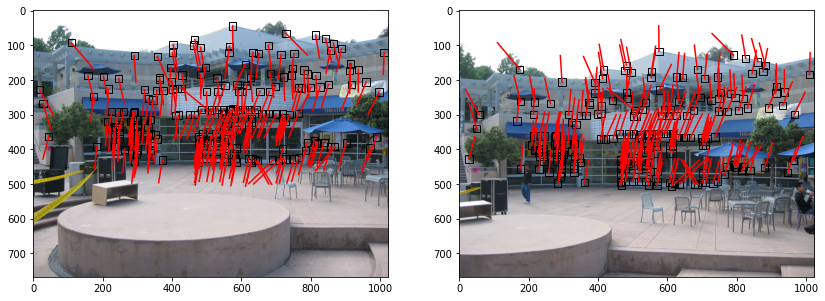

In [5]:
from scipy.stats import chi2
import random
from sympy import symbols, Matrix, solveset
from sympy.solvers import solve

def Homogenize(x):
    # converts points from inhomogeneous to homogeneous coordinates    
    return np.vstack((x,np.ones((1,x.shape[1]))))

def Dehomogenize(x):
    # converts points from homogeneous to inhomogeneous coordinates   
    return x[:-1]/x[-1]

def DisplayResults(F, title):
    print(title+' =')
    print(F/np.linalg.norm(F)*np.sign(F[-1,-1]))

def calculateConsensusCost(error, tol, count):
    '''
        Helper function to calculate consensus cost
    '''
    inlier_indices = []
    cost = 0
    for i in range(count):
        if(error[i] <= tol):
            cost += error[i]
            inlier_indices.append(i)
        else:
            cost += tol
    return cost, inlier_indices

def findMinimumSolver(x1_points, x2_points):
    A = np.empty((x1_points.shape[1], 9))
    for i in range(x1_points.shape[1]):
        a = np.kron(Homogenize(x2_points[:, i].reshape(2,1)).T, Homogenize(x1_points[:, i].reshape(2,1)).T)
        A[i, :] = a.ravel()

    _, _, V = np.linalg.svd(A)
    x_LN = V[-2:,:].T # left nullspace
    F1 = x_LN[:,0].reshape(3,3)
    F2 = x_LN[:,1].reshape(3,3)
    alpha = symbols('alpha')
    F = Matrix(alpha*F1 + F2)
    answer = solve(Matrix.det(F), alpha) # enforces det(F) = 0
    
    alpha_sol = np.array(answer).astype(np.complex64)
    alpha_sol = [a.real for a in alpha_sol if np.isclose(a.imag, 0, atol=1e-20)]
    F_sol = []
    for al in alpha_sol:
        F_sol.append(al*F1 + F2)
    return F_sol

def calculateSampsonError(F, pts1, pts2):
    '''
        pts1, pts2 = inhomogenous coords, 2n
        H12 = 3x1
    '''
    error_points = []
    for i in range(pts1.shape[1]):
        x2 = pts2[0,i]
        y2 = pts2[1,i]
        x1 = pts1[0,i]
        y1 = pts1[1,i]
        J = np.array([x2*F[0,0] + y2*F[1,0] + F[2,0],
                      x2*F[0,1] + y2*F[1,1] + F[2,1],
                      x1*F[0,0] + y1*F[0,1] + F[0,2],
                      x1*F[1,0] + y1*F[1,1] + F[1,2]]).reshape(1, -1)
        epsilon = Homogenize(pts2[:, i].reshape(2,1)).T @ F @ Homogenize(pts1[:, i].reshape(2, 1))
        lambdas = -epsilon.item() / (J @ J.T)
        errors = (epsilon.item() ** 2) / (J @ J.T)
        error_points.append(errors.item())
    return error_points

def MSAC(pts1, pts2, thresh, tol, p):
    # Inputs:
    #    pts1 - matched feature correspondences in image 1
    #    pts2 - matched feature correspondences in image 2
    #    thresh - cost threshold
    #    tol - reprojection error tolerance 
    #    p - probability that as least one of the random samples does not contain any outliers   
    #
    # Output:
    #    consensus_min_cost - final cost from MSAC
    #    consensus_min_cost_model - fundamental matrix F
    #    inliers - list of indices of the inliers corresponding to input data
    #    trials - number of attempts taken to find consensus set
    
    """your code here"""
    trials = 0
    max_trials = np.inf
    consensus_min_cost = np.inf
    consensus_min_cost_model = np.zeros((3,3))
    inliers = np.random.randint(0, 200, size=100)
    np.random.seed(15)
    while(trials < max_trials and consensus_min_cost > thresh):
        indices = np.random.choice(range(pts1.shape[1]), 7)
        x1_points = pts1[:, indices]
        x2_points = pts2[:, indices]
        F = findMinimumSolver(x1_points, x2_points)
        for sol in F:
            errors = calculateSampsonError(sol, pts1, pts2)
            consensus_cost, inlier_indices = calculateConsensusCost(errors, tol, pts1.shape[1])
            if(consensus_cost < consensus_min_cost):
                consensus_min_cost = consensus_cost
                consensus_min_cost_model = sol
                inliers = inlier_indices
                w = len(inlier_indices) / pts1.shape[1]
                if(w > 0):
                    max_trials = np.log(1 - p) / np.log(1 - (w**7))
        trials += 1
    return consensus_min_cost, consensus_min_cost_model, inliers, trials


# MSAC parameters 
thresh = 200
codim = 1
p = 0.99
alpha = 0.95
tol = chi2.ppf(alpha, codim)

tic=time.time()

cost_MSAC, F_MSAC, inliers, trials = MSAC(match1, match2, thresh, tol, p)

# choose just the inliers
xin1 = match1[:,inliers]
xin2 = match2[:,inliers]

toc=time.time()
time_total=toc-tic

# display the results
print('took %f secs'%time_total)
print('%d iterations'%trials)
print('inlier count: ',len(inliers))
print('inliers: ',inliers)
print('MSAC Cost = %.9f'%cost_MSAC)
DisplayResults(F_MSAC, 'F_MSAC')

# display the figures
plt.figure(figsize=(14,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)

for i in range(xin1.shape[1]):
    x1,y1 = xin1[:,i]
    x2,y2 = xin2[:,i]
    ax1.plot([x1, x2],[y1, y2],'-r')
    ax1.add_patch(patches.Rectangle((x1-w/2,y1-w/2),w,w, fill=False))
    ax2.plot([x2, x1],[y2, y1],'-r')
    ax2.add_patch(patches.Rectangle((x2-w/2,y2-w/2),w,w, fill=False))

plt.show()

#### Final values for parameters
* random seed = 15
* $p$ = 0.99
* $\alpha$ = 0.95
* tolerance = 3.841458820694124
* threshold = 200
* num_inliers = 216
* num_attempts = 15
* consensus_min_cost = 260.362835966

## Problem 5 (Programming): Linear Estimation of the Fundamental Matrix (15 points)
  Estimate the fundamental matrix $\boldsymbol{F}_\text{DLT}$ from the
  resulting set of inlier correspondences using the direct linear
  transformation (DLT) algorithm (with data normalization).  Include
  the numerical values of the resulting $\boldsymbol{F}_\text{DLT}$, scaled
  such that $||\boldsymbol{F}_\text{DLT}||_\text{Fro} = 1$

In [6]:
def Normalize(pts):
    # data normalization of n dimensional pts
    #
    # Input:
    #    pts - is in inhomogeneous coordinates
    # Outputs:
    #    pts - data normalized points
    #    T - corresponding transformation matrix
    
    """your code here"""
    num_axes = pts.shape[0]
    var = np.var(pts, axis=1)
    mean = np.mean(pts, axis=1)
    var_sum = np.sum(var)
    s = np.sqrt(num_axes / var_sum)
        
    T = np.eye(pts.shape[0]+1)
    
    diagonal = np.eye(pts.shape[0]) * s
    T[:num_axes, :num_axes] = diagonal
    
    T[:num_axes, -1] = -mean * s
    pts = np.matmul(T, Homogenize(pts))
    return pts, T

def DLT(x1, x2, normalize=True):
    # Inputs:
    #    x1 - inhomogeneous inlier correspondences in image 1
    #    x2 - inhomogeneous inlier correspondences in image 2
    #    normalize - if True, apply data normalization to x1 and x2
    #
    # Outputs:
    #    F - the DLT estimate of the fundamental matrix  
    
    """your code here"""
    
    # data normalization
    if normalize:
        x1, T1 = Normalize(x1)
        x2, T2 = Normalize(x2)
    else:
        x1 = Homogenize(x1)
        x2 = Homogenize(x2)
    
    A = np.empty((x2.shape[1], 9))
    
    for i in range(x1.shape[1]):
        A[i : i + 1, :] = np.kron(x2[:, i].reshape(3,1).T, x1[:, i].reshape(3,1).T)

    _ , _, V = np.linalg.svd(A)
    F = V[-1, :]
    F = np.reshape(F, (3,3))
    
    # rank 2 constraint
    U, S, V = np.linalg.svd(F)
    S[2] = 0.0
    F = U @ np.diag(S) @ V
    
    # data denormalize
    if normalize:
        F = T2.T @ F @ T1
    
    return F


# compute the linear estimate with data normalization
print ('DLT with Data Normalization')
time_start=time.time()
F_DLT = DLT(xin1, xin2, normalize=True)
time_total=time.time()-time_start
# display the resulting F_DLT, scaled with its frobenius norm
DisplayResults(F_DLT, 'F_DLT')

DLT with Data Normalization
F_DLT =
[[ 2.50626879e-08  3.70974193e-06 -1.45985025e-03]
 [-2.59367920e-06  5.37261953e-07 -1.02768107e-02]
 [ 1.25013090e-03  9.16071806e-03  9.99903383e-01]]


## Problem 6 (Programming): Nonlinear Estimation of the Fundamental Matrix (70 points) 
  Retrieve the camera projection matrices $\boldsymbol{P} = [\boldsymbol{I} \,|\,
  \boldsymbol{0}]$ and $\boldsymbol{P}' = [\boldsymbol{M} \,|\, \boldsymbol{v}]$, where $\boldsymbol{M}$
  is full rank, from $\boldsymbol{F}_\text{DLT}$.  Use the resulting camera
  projection matrix $\boldsymbol{P}'$ associated with the second image and
  the triangulated 3D points as an initial estimate to an iterative
  estimation method, specifically the sparse Levenberg-Marquardt
  algorithm, to determine the Maximum Likelihood estimate of the
  fundamental matrix $\boldsymbol{F} = [\boldsymbol{v}]_\times \boldsymbol{M}$ that
  minimizes the reprojection error.  The initial estimate of the 3D
  points must be determined using the two-view optimal triangulation
  method described in lecture (algorithm 12.1 in the Hartley \&
  Zisserman book, but use the ray-plane intersection method for the
  final step instead of the homogeneous method).  Additionally, you
  must parameterize the camera projection matrix $\boldsymbol{P}'$ associated
  with the second image and the homogeneous 3D scene points that are
  being adjusted using the parameterization of homogeneous vectors.
  
  Report the initial cost (i.e. cost at iteration 0) and the cost at the end
  of each successive iteration. Show the numerical values for the final 
  estimate of the fundamental matrix $\boldsymbol{F}_\text{LM}$, scaled
  such that $||\boldsymbol{F}_\text{LM}||_\text{Fro} = 1$.

In [7]:
def estPFromF(F):
    '''
        Function to get P, P_hat from F
    '''
    P = np.hstack((np.eye(3), np.array([0,0,0]).reshape(-1,1)))
    U, D, V = np.linalg.svd(F, full_matrices=True)
    D[2] = (D[0] + D[1]) / 2.0
    W = np.zeros((3,3))
    Z = np.zeros((3,3))
    W[0,1] = 1
    W[1,0] = -1
    
    Z[0,1] = -1
    Z[1,0] = 1
    Z[-1,-1] = 1
    
    S = U @ W @ U.T
    M = U @ Z @ np.diag(D) @ V
    e = np.zeros((3,1))
    # skew symmetric representation of e is S
    e[0,0] = S[2,1]
    e[1,0] = S[0,2]
    e[2,0] = S[1,0]
    P_hat = np.hstack((M, e))
    return P, P_hat

In [8]:
def skew(w):
    # Returns the skew-symmetrix represenation of a vector
    """your code here"""
    w = w.ravel()
    w_skew = np.array([
        [0, -w[2], w[1]],
        [w[2], 0, -w[0]],
        [-w[1], w[0], 0]
    ])
    return w_skew

def estFFromP(P1, P2):
    '''
        Function to get F from P1, P2
    '''
    P_inv = np.linalg.pinv(P1)
    _, _, V = np.linalg.svd(P1)
    C = V[-1,:].reshape(4, 1)
    e_dash = P2 @ C
    e_skew = skew(e_dash)
    
    F = e_skew @ P2 @ P_inv
    return F

In [9]:
def getScaledEpipole(F):
    '''
        Helper function to get scaled epipole of fundamental matrix F
    '''
    _,_,Vh = np.linalg.svd(F, full_matrices=False)
    e = Vh[-1,:].reshape(3,1)
    _,_,VhT = np.linalg.svd(F.T, full_matrices=False)
    eT = VhT[-1,:].reshape(3,1)
    
    e12 = e[0,0]**2 + e[1,0]**2
    eT12 = eT[0,0]**2 + eT[1,0]**2
    e = np.sqrt(1.0/e12) * e
    eT = np.sqrt(1.0/eT12) * eT
    return e, eT

In [10]:
def findLowestCost(candidate_t, a, b, c, d, f, f1):
    '''
        Helper function to find the value of t with the lowest cost
    '''
    cost = np.inf
    t_best = 0
    for t in candidate_t:
        num1 = t**2
        num2 = (c*t + d)**2
        den1 = 1 + ((f**2)*(t**2))
        den2 = ((a*t + b)**2) + (f1**2)*((c*t + d)**2)
        cost_so_far = (num1/den1) + (num2/den2)
        if(cost_so_far < cost):
            t_best = t
            cost = cost_so_far
    num1 = 1
    den1 = f**2
    num2 = c**2
    den2 = a**2 + (f1**2 * c**2)
    cost_so_far = (num1/den1) + (num2/den2)
    
    if(cost_so_far < cost):
        cost = cost_so_far
        t_best = np.inf
    return t_best

In [11]:
def solveEquation(a, b, c, d, f, f1):
    '''
        Helper function to solve the 6 degree equation, find
        t that results in lowest cost and returning the optimally corrected points
    '''
    t = symbols('t')
    gt = t*(((a*t + b)**2 + (f1**2)*((c*t + d)**2))**2) - \
         (a*d - b*c)*((1 + ((f**2)*(t**2)))**2)*(a*t + b)*(c*t + d)
    t_sol = list(solveset(gt, t))
    
    t_final = np.array(t_sol).astype(np.complex64)
    t_final = [a.real for a in t_final] # pick real parts of all the solutions
    
    t_best = findLowestCost(t_final, a, b, c, d, f, f1)
    
    
    if(t_best == np.inf):
        L1 = np.array([f, 0, -1]).T
        L2 = np.array([-f1*c, a, c]).T
    else:
        L1 = np.array([t_best*f, 1, -t_best]).T
        L2 = np.array([-f1*(c*t_best + d), a*t_best + b, c*t_best + d]).T
    
    # find points closest to the origin, using the result in question 1
    x = np.array([-L1[0] * L1[2], -L1[1] * L1[2], (L1[0] **2) + (L1[1]**2)]).reshape(3,1)
    x_p = np.array([-L2[0] * L2[2], -L2[1] * L2[2], (L2[0]**2) + (L2[1]**2)]).reshape(3,1)
    return x, x_p
    
def triangulation(x1, x2, F, P1, P2):
    '''
        Function to calculate the scene point using triangulation
        for a given pair x1, x2
    '''
    x1_h = Homogenize(x1)
    x2_h = Homogenize(x2)
    T1 = np.eye(3) * x1_h[2,0]
    T2 = np.eye(3) * x2_h[2,0]
    T1[0, 2] = -x1_h[0,0]
    T1[1, 2] = -x1_h[1,0]
    T2[0, 2] = -x2_h[0,0]
    T2[1, 2] = -x2_h[1,0]
    
    Fs = np.linalg.inv(T2).T @ F @ np.linalg.inv(T1)
    
    e1, e2 = getScaledEpipole(Fs)
    
    R1 = np.eye(3) * e1[0,0]
    R2 = np.eye(3) * e2[0,0]
    
    R1[-1,-1] = 1
    R1[0, 1] = e1[1,0]
    R1[1, 0] = -e1[1,0]
    
    R2[-1,-1] = 1
    R2[0, 1] = e2[1,0]
    R2[1, 0] = -e2[1,0]
    Fs = R2 @ Fs @ R1.T
    
    f = e1[2, 0]
    f1 = e2[2,0]
    a = Fs[1,1]
    b = Fs[1,2]
    c = Fs[2,1]
    d = Fs[2,2]

    x, x_p = solveEquation(a, b, c, d, f, f1)
    
    # optimally corrected points
    x_hat1 = np.linalg.inv(T1) @ R1.T @ x
    x_hat2 = np.linalg.inv(T2) @ R2.T @ x_p
    
    l_hat = np.dot(F, x_hat1)
    l_hat_ortho = np.array([-l_hat[1,0]*x_hat2[2,0], 
                            l_hat[0,0]*x_hat2[2,0],
                            l_hat[1,0]*x_hat2[0,0] - l_hat[0,0] * x_hat2[1,0]]).reshape(3,1)
    
    plane_pi = P2.T @ l_hat_ortho

    P_inv = np.linalg.pinv(P1)
    
    x_h = P_inv.dot(x_hat1)
    
    X_pi = np.array([plane_pi[3,0] * x_h[0,0],
                     plane_pi[3,0] * x_h[1,0],
                     plane_pi[3,0] * x_h[2,0],
                     -(plane_pi[0,0] * x_h[0,0] + plane_pi[1,0] * x_h[1,0] + plane_pi[2,0] * x_h[2,0])]).reshape(4,1)   
    return Dehomogenize(X_pi)

In [12]:
def getCorrectedPoints(x1, x2, F):
    '''
        helper function to get 3D scene points using triangulation
        x1 - 2D points in image 1
        x2 - 2D points in image 2
        F - Fundamental matrix
    '''
    P1, P2 = estPFromF(F)
    X = np.zeros((3, x1.shape[1]))
    for i in range(x1.shape[1]):
        X_hat = triangulation(x1[:, i].reshape(2,1), x2[:, i].reshape(2,1), F, P1, P2)
        X[:, i] = X_hat.ravel()
    return X

In [13]:
def Sinc(x):
    """your code here"""
    if(x == 0):
        return 1
    return np.sin(x) / x

def dSinc(x):
    if(x == 0):
        return 0
    else:
        val = (np.cos(x) / x) - (np.sin(x) / np.power(x, 2))
        return val

def Parameterize(P):
    # wrapper function to interface with LM
    # takes all optimization variables and parameterizes all of them
    # in this case it is just P, but in future assignments it will
    # be more useful
    return ParameterizeHomog(P.reshape(-1,1))


def Deparameterize(p):
    # Deparameterize all optimization variables
    return DeParameterizeHomog(p)


def ParameterizeHomog(V):
    # Given a homogeneous vector V return its minimal parameterization
    """your code here"""
    V = V / np.linalg.norm(V) * np.sign(V[-1])
    v_hat = 2*V[1:]/Sinc(np.arccos(V[0]))
    if(np.linalg.norm(v_hat) > np.pi):
        v_hat = (1 - 2*np.pi/np.linalg.norm(v_hat) * np.ceil((np.linalg.norm(v_hat)-np.pi)/(2*np.pi)))*v_hat
    return v_hat    


def DeParameterizeHomog(v):
    # Given a parameterized homogeneous vector return its deparameterization
    """your code here"""
    norm = np.linalg.norm(v)
    a = np.array([[np.cos(norm / 2.0)]])
    b = Sinc(norm / 2.0) / 2.0 * v
    v_bar = np.vstack((a, b))
    return v_bar

In [14]:
def Dp_dp(p):
    '''
        Helper function to return calculation of derivative for
        homogenous parameterized vector p
    '''
    norm_p = np.linalg.norm(p)
    row = p.shape[0]
    a = np.cos(norm_p / 2) # 1x1
    b = 0.5 * Sinc(norm_p / 2) * p # 11x1
    if(norm_p == 0):
        da_dp = np.zeros((1, row))
        db_dp = 0.5 * np.eye(row)
    else:
        da_dp = -0.5 * b.T # 1x11
        db_dp = (0.5 * Sinc(norm_p/2) * np.eye(row)) + \
                (0.25/norm_p * dSinc(0.5 * norm_p) * np.dot(p, p.T)) # 11x11
    return np.vstack((da_dp, db_dp))

In [15]:
def Jacobian(p, P1, X_h):
    '''
        p = parameterized Projection matrix of second image
        P1 = normalized camera projection matrix of image 1
        X_h = parameterized 3d points
    '''
    A = []
    B = []
    B_dash = []
    P2 = Deparameterize(p).reshape(3,4)
    x_1 = np.zeros((2, X_h.shape[1]))
    x_2 = np.zeros((2, X_h.shape[1]))
    for i in range(X_h.shape[1]):
        x_1[:, i] = Dehomogenize(P1 @ Deparameterize(X_h[:, i].reshape(3,1))).reshape(2, )
        x_2[:, i] = Dehomogenize(P2 @ Deparameterize(X_h[:, i].reshape(3,1))).reshape(2, ) # 2 x n
    
    for i in range(X_h.shape[1]):
        X = Deparameterize(X_h[:, i].reshape(3,1))
        w_Ai = P2[-1, :].reshape(4, 1).T.dot(X)
        zero_vec = np.zeros((4))
        Xi = X.T
        XiXi = -x_2[0,i] * Xi
        YiXi = -x_2[1,i] * Xi
        Ai = (1.0/w_Ai)* np.block([[Xi, zero_vec.T, XiXi],
                                   [zero_vec.T, Xi, YiXi]])
        Ai = Ai @ Dp_dp(p)
        
        w_Bi = P1[-1, :].reshape(4, 1).T.dot(X)
        Bi = (1/w_Bi) * np.block([[P1[0,:].T - x_1[0,i]*P1[2,:].T],
                                  [P1[1,:].T - x_1[1,i]*P1[2,:].T]])
        Bi = Bi @ Dp_dp(X_h[:, i].reshape(3,1))
        
        w_Bi_dash = P2[-1, :].reshape(4, 1).T.dot(X)
        Bi_dash = (1/w_Bi_dash) * np.block([[P2[0,:].T - x_2[0,i]*P2[2,:].T],
                                            [P2[1,:].T - x_2[1,i]*P2[2,:].T]])
        Bi_dash = Bi_dash @ Dp_dp(X_h[:, i].reshape(3,1))
        
        A.append(Ai)
        B.append(Bi)
        B_dash.append(Bi_dash)

    return A, B, B_dash    

In [16]:
from scipy.linalg import block_diag

def ComputeCost(x1_norm, x2_norm, cov1, cov2, P1, P2, X, total_points):
    cost = 0
    for i in range(total_points):
        eps1 = Dehomogenize(x1_norm[:, i].reshape(3, 1)) - Dehomogenize(P1 @ X[:, i].reshape(4,1))
        eps2 = Dehomogenize(x2_norm[:, i].reshape(3, 1)) - Dehomogenize(P2 @ X[:, i].reshape(4,1))
        cost += (eps1.T @ np.linalg.inv(cov1) @ eps1) + \
                (eps2.T @ np.linalg.inv(cov2) @ eps2)
    return cost[0,0]

def getUVW(A, B1, B2, cov1, cov2, num_points):
    U = np.zeros((11,11))
    V = []
    W = []
    for i in range(num_points):
        Ai = A[i]
        B1i = B1[i]
        B2i = B2[i]
        U += Ai.T @ np.linalg.inv(cov2) @ Ai # 11x11
        vi = (B1i.T @ np.linalg.inv(cov1) @ B1i) + (B2i.T @ np.linalg.inv(cov2) @ B2i) #3x3
        V.append(vi)
        wi = Ai.T @ np.linalg.inv(cov2) @ B2i # 11x3
        W.append(wi)
    return U, V, W

def getEps(x1_norm, x2_norm,cov1, cov2, P1, P2, X_norm, A, B1, B2, num_points):
    epsa = 0
    epsb = []
    for i in range(num_points):
        Ai = A[i]
        B1i = B1[i]
        B2i = B2[i]
        eps1i = Dehomogenize(x1_norm[:, i].reshape(3,1)) - \
                Dehomogenize(P1 @ Deparameterize(X_norm[:, i].reshape(3, 1)))
        eps2i = Dehomogenize(x2_norm[:, i].reshape(3,1)) - \
                Dehomogenize(P2 @ Deparameterize(X_norm[:, i].reshape(3, 1)))
        epsa += Ai.T @ np.linalg.inv(cov2) @ eps2i
        epsbi = (B1i.T @ np.linalg.inv(cov1) @ eps1i) + \
                (B2i.T @ np.linalg.inv(cov2) @ eps2i)
        epsb.append(epsbi)
    return epsa, epsb

def LM(F, x1, x2, max_iters, lam):
    # Input:
    #    F - DLT estimate of the fundamental matrix
    #    x1 - inhomogeneous inlier points in image 1
    #    x2 - inhomogeneous inlier points in image 2
    #    max_iters - maximum number of iterations
    #    lam - lambda parameter
    # Output:
    #    F - Final fundamental matrix obtained after convergence
    
   
    """your code here"""
    x1_norm, T1 = Normalize(x1)
    x2_norm, T2 = Normalize(x2)
    X_init = getCorrectedPoints(x1, x2, F)
    X_norm, U1 = Normalize(X_init)
    cov1 = np.eye(2) * (T1[0,0] ** 2)
    cov2 = np.eye(2) * (T2[0,0] ** 2)
    
    P1, P2 = estPFromF(F)
    P1 = T1 @ P1 @ np.linalg.inv(U1)
    P2 = T2 @ P2 @ np.linalg.inv(U1)
    P1 /= (np.linalg.norm(P1)*np.sign(P1[-1,-1]))
    P2 /= (np.linalg.norm(P2)*np.sign(P2[-1,-1]))
    
    cost_prev = ComputeCost(x1_norm, x2_norm, cov1, cov2, P1, P2, X_norm, x1.shape[1])
    print('Intial cost: ', cost_prev)
    
    j = 0
    while j < max_iters:
        p = Parameterize(P2)
        
        # parameterize the points
        X_param = np.zeros((3, X_norm.shape[1]))
        for i in range(X_norm.shape[1]):
            X_param[:, i] = Parameterize(X_norm[:,i].reshape(4,1)).reshape(3, )
        A, B1, B2 = Jacobian(p, P1, X_param)
        
        U,V,W = getUVW(A, B1, B2, cov1, cov2, x1_norm.shape[1])
        epsa, epsb = getEps(x1_norm, x2_norm, cov1, cov2, P1, P2, X_param, A, B1, B2, x1.shape[1])
        
        U_aug = U + (lam * np.eye(U.shape[0]))
        S = 0
        e = 0
        for i in range(x1.shape[1]):
            Vi_aug = V[i] + lam * np.eye(V[i].shape[0])
            S += W[i] @ np.linalg.inv(Vi_aug) @ W[i].T
            e += W[i] @ np.linalg.inv(Vi_aug) @ epsb[i]
        S_bar = U_aug - S
        e_bar = epsa - e
        
        deltaA = np.linalg.inv(S_bar) @ e_bar # 11x1
        deltaB = []
        for i in range(X_norm.shape[1]):
            deltaBi = np.linalg.inv(V[i] + lam * np.eye(V[i].shape[1])) @ (epsb[i] - W[i].T @ deltaA)
            deltaB.append(deltaBi)
        
        p_0 = p + deltaA
        P_0 = Deparameterize(p_0).reshape(3,4)
        
        X_norm_0 = []
        for i in range(X_norm.shape[1]):
            X_norm_0.append(X_param[:, i].reshape(-1, 1) + deltaB[i])
        X_norm_0 = np.concatenate(X_norm_0, axis=1)
        X_norm_0 = X_norm_0.reshape(3, -1)
        
        X_deparam_0 = np.zeros((4, X_norm_0.shape[1]))
        for i in range(X_norm_0.shape[1]):
            X_deparam_0[:, i] = Deparameterize(X_norm_0[:,i].reshape(3,1)).reshape(4, )
        cost_0 = ComputeCost(x1_norm, x2_norm, cov1, cov2, P1, P_0, X_deparam_0, X_norm_0.shape[1])
        
        if(1 - cost_0/cost_prev < 1e-15):
            break
            
        if(cost_0 < cost_prev):
            P2 = P_0
            X_norm = X_deparam_0
            lam = 0.1 * lam
            cost_prev = cost_0
            print ('iter %03d Cost %.9f'%(j+1, cost_0))
            j = j + 1
        else:
            print ('iter %03d Cost %.9f'%(j+1, cost_0))
            lam = 10.0 * lam
    # function to get F from P1, P2
    P2 = np.linalg.inv(T2) @ P2 @ U1
    P1 = np.linalg.inv(T1) @ P1 @ U1
    F = estFFromP(P1, P2)
    return F

# LM hyperparameters
lam = .001
max_iters = 10

# Run LM initialized by DLT estimate
print ('Sparse LM')
time_start=time.time()
F_LM = LM(F_DLT, xin1, xin2, max_iters, lam)
time_total=time.time()-time_start
print('took %f secs'%time_total)

# display the resulting F_LM, scaled with its frobenius norm
DisplayResults(F_LM, 'F_LM')

Sparse LM
Intial cost:  50.7577177563713
iter 001 Cost 45.049261530
iter 002 Cost 44.393430639
iter 003 Cost 44.393426954
iter 004 Cost 44.393426941
iter 005 Cost 44.393426941
iter 006 Cost 44.393426941
took 44.100819 secs
F_LM =
[[ 2.20538547e-08  4.02741643e-06 -1.51220870e-03]
 [-2.87790471e-06  5.50358502e-07 -1.02735886e-02]
 [ 1.31806489e-03  9.13774820e-03  9.99903461e-01]]


## Problem 7 (Programming): Point to Line Mapping (10 points)
  Qualitatively determine the accuracy of $\boldsymbol{F}_\text{LM}$ by
  mapping points in image 1 to epipolar lines in image 2.  Identify
  three distinct corners distributed in image 1 that are 
  not in the set of inlier correspondences, <i>visually</i> approximate 
  their pixel coordinates $\boldsymbol{x}_{\{1,2,3\}}$, and map them to
  epipolar lines $\boldsymbol{l'}_{\{1,2,3\}} = \boldsymbol{F}_\text{LM}
  \boldsymbol{x}_{\{1,2,3\}}$ in the second image under the fundamental
  matrix $\boldsymbol{F}_\text{LM}$.

  Include a figure containing the pair of images,
  where the three points in image 1 are indicated by a square (or
  circle) about the feature and the corresponding epipolar lines are
  drawn in image 2. Comment on the qualitative accuracy of the mapping. (Hint: each line 
  $\boldsymbol{l'}_i$ should pass through the point $\boldsymbol{x'}_i$ in image 2 that 
  corresponds to the point $\boldsymbol{x}_i$ in image 1).

/var/folders/km/7_v861mx0cb9fp42nvllkmt00000gn/T/ipykernel_5055/3547620181.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(xx,yy,'-r', color=colors[i])


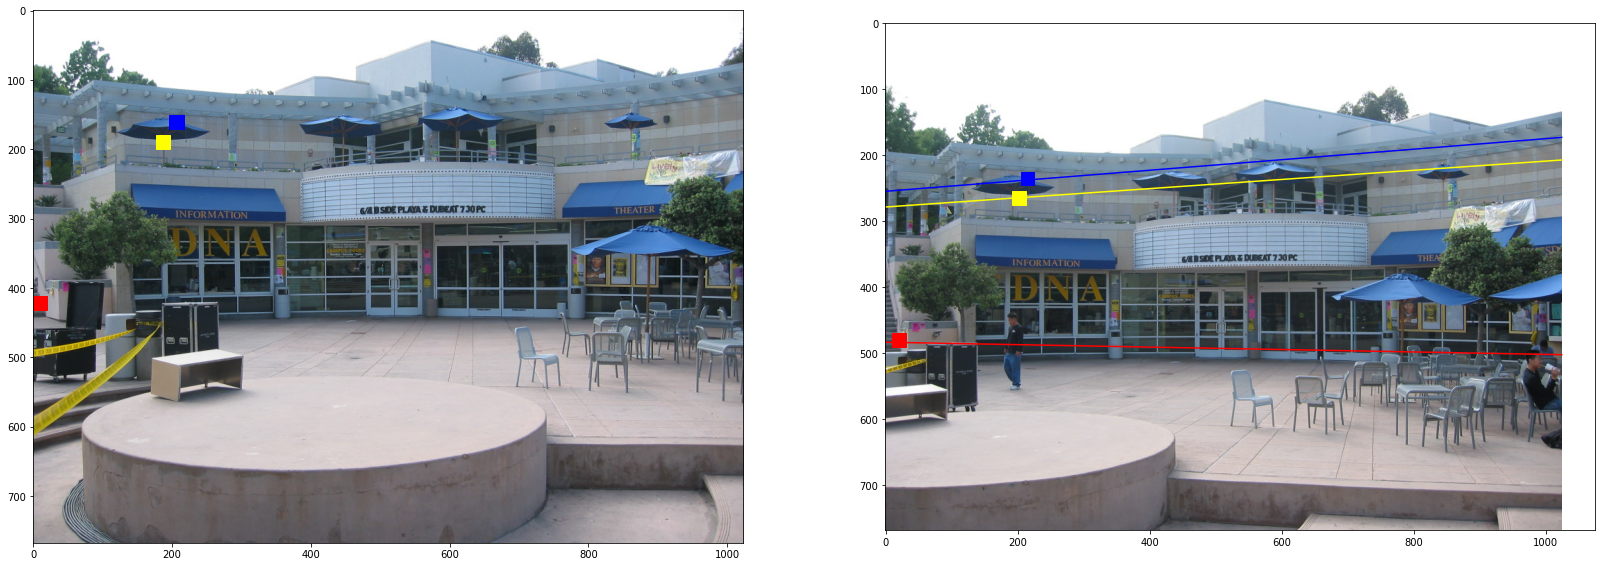

In [17]:
# Store your three points in image 1 in variable xchosen1
# Store the corresponding epipolar lines in variable epi_lines

# You can modify the code to display the figures, to highlight the corresponding point in image 2.
#    You will have to find the pixel co-ordinates of the 
#    corresponding point in image 2 manually, as we are explicitly choosing outliers(find the real matching point
#    and not the one your code outputs). The epipolar lines should
#    pass close by or through these points.
# 

"""your code here"""
xchosen1 = np.array([[9.5, 206, 186.8],
                    [421.5, 161, 189.65]])# 3 outlier points in image 1
xchosen2 = np.array([[20, 215, 202],
                    [480, 235, 265]]) # visual approximation of their corresponding points in image 2
epi_lines = F_LM @ Homogenize(xchosen1)

# display the figures
plt.figure(figsize=(28,16))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)
im_height, im_width = I1.shape[:2]
x_ax = np.linspace(0, im_width, im_width*10)
colors = ['red', 'blue', 'yellow']
for i in range(xchosen1.shape[1]):
    a, b, c = epi_lines[:, i]
    xx, yy = [], []
    for xval in x_ax:
        yval = -(a/b)*xval - c/b
        if yval > 0 and yval < im_width:
            xx.append(xval)
            yy.append(yval)
    x1,y1 = xchosen1[:,i]
    x2,y2 = xchosen2[:,i]
    ax1.add_patch(patches.Rectangle((x1-w/2,y1-w/2),w,w, fill=True, color=colors[i]))
    ax2.add_patch(patches.Rectangle((x2-w/2,y2-w/2),w,w, fill=True, color=colors[i]))
    ax2.plot(xx,yy,'-r', color=colors[i])
plt.show()

"""Comment on your results here.""" <br>

Each epipolar line $\boldsymbol{l'}_i$ in Image 2 approximately passes through the point $\boldsymbol{x'}_i$ in image 2, which roughly corresponds to the point $\boldsymbol{x}_i$ in image 1, leading to the conclusion that the mapping is fairly accurate. 